KeyError: range(81, 111) During handling of the above exception, another exception occurred:
pandas 读数据是一点要！！！ iloc

In [203]:
import numpy as np
import pandas as pd
dall = pd.read_excel('dataall.xlsx') # 导入数据
date = dall.date
d = dall.S
new_date = dall.new_date

Text(0.5, 1.0, 'price of stocks')

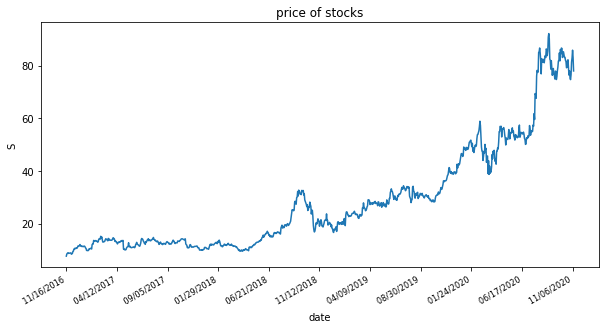

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(date[::-1],d[::-1])
plt.xticks(date[::-1][::100],size=8)
plt.ylabel('S')
plt.gcf().autofmt_xdate()
plt.xlabel('date')
plt.title('price of stocks')

In [205]:
data = d[::-1]

In [206]:
yt_1 =data. shift (1)
yt_2 =data. shift (2)
yt_3 =data. shift (3)
yt_4 =data. shift (4)
yt_5 =data. shift (5)
data =pd. concat ([data ,yt_1 , yt_2 ,yt_3 ,yt_4 ,yt_5 ], axis =1)
data . columns = ['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
data = data . dropna ()  # 除去NULL，因为序列的起始点是没有历史的
print(data.tail( 6 ))

      yt   yt_1   yt_2   yt_3   yt_4   yt_5
5  76.58  74.70  75.29  78.02  76.40  78.88
4  81.35  76.58  74.70  75.29  78.02  76.40
3  83.00  81.35  76.58  74.70  75.29  78.02
2  85.88  83.00  81.35  76.58  74.70  75.29
1  83.12  85.88  83.00  81.35  76.58  74.70
0  77.99  83.12  85.88  83.00  81.35  76.58


#### 数据处理与标准化

In [207]:
y = data.loc[:,'yt']
x = data.loc[:,['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']]
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range =(-1, 1))
x = np. array (x). reshape (( len(x) ,5 ))
x = scaler_x . fit_transform (x)
scaler_y = MinMaxScaler (
feature_range =( -1, 1))
y = np. array (y). reshape (( len(y), 1))
y = scaler_y . fit_transform (y)
train_end = 850
x_train =x[0: train_end ,]
x_test =x[train_end +1:1003 ,]
y_train =y[0: train_end ]
y_test =y[ train_end +1:1003]
x_train = x_train . reshape ( x_train . shape + (1 ,))
x_test = x_test . reshape ( x_test . shape + (1 ,))
print(x_train . shape)  

(850, 5, 1)


In [208]:
x_test.shape

(147, 5, 1)

In [209]:
from keras . layers . recurrent import GRU
from keras.models import Sequential
from keras.layers import Activation, Dense
seed =2019
np.random.seed( seed )

model = Sequential()
model .add(GRU(units=4,
                return_sequences =False ,
                activation ='tanh', 
                recurrent_activation ='hard_sigmoid',
                input_shape =(5 , 1)))
model.add(Dense(units =1, activation = 'linear'))
model. compile (loss ='mean_squared_error',optimizer = 'rmsprop')
model.fit( x_train , y_train , batch_size =32, epochs =50 , shuffle = False ) ## shuffle matters！！ 
print(model . summary ())

score_train = model.evaluate (x_train , y_train , batch_size =32)
score_test = model.evaluate (x_test , y_test , batch_size =32)
print ("in train MSE = ", round( score_train,4))
print ("in test MSE = ", round( score_test ,4))

pred = model.predict(x_test)
# pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

Epoch 1/50
850/850 [==============================] - 1s 1ms/step - loss: 0.1058
Epoch 2/50
850/850 [==============================] - 0s 168us/step - loss: 0.0420
Epoch 3/50
850/850 [==============================] - 0s 169us/step - loss: 0.0186
Epoch 4/50
850/850 [==============================] - 0s 241us/step - loss: 0.0115
Epoch 5/50
850/850 [==============================] - 0s 216us/step - loss: 0.0091
Epoch 6/50
850/850 [==============================] - 0s 246us/step - loss: 0.0076
Epoch 7/50
850/850 [==============================] - 0s 275us/step - loss: 0.0064
Epoch 8/50
850/850 [==============================] - 0s 281us/step - loss: 0.0054
Epoch 9/50
850/850 [==============================] - 0s 246us/step - loss: 0.0046
Epoch 10/50
850/850 [==============================] - 0s 251us/step - loss: 0.0040
Epoch 11/50
850/850 [==============================] - 0s 224us/step - loss: 0.0034
Epoch 12/50
850/850 [==============================] - 0s 229us/step - loss: 0.0030 0s 

Text(0.5, 1.0, 'price of stocks')

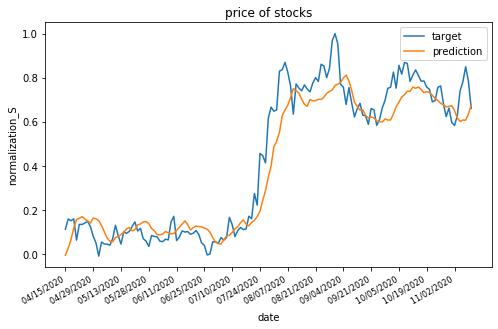

In [210]:
plt.figure(figsize=(8,5))
plt.plot(date[:147][::-1],y_test)
plt.plot(date[:147][::-1],pred)
plt.legend(['target','prediction'])
plt.xticks(date[:147][::-1][::10],size=8)
plt.ylabel('normalization_S')
plt.gcf().autofmt_xdate()
plt.xlabel('date')
plt.title('price of stocks')

In [211]:
date[:147][::-1]

146      04/15/2020
145      04/16/2020
144      04/17/2020
143      04/20/2020
142      04/21/2020
141      04/22/2020
140      04/23/2020
139      04/24/2020
138      04/27/2020
137      04/28/2020
136      04/29/2020
135      04/30/2020
134      05/01/2020
133      05/04/2020
132      05/05/2020
131      05/06/2020
130      05/07/2020
129      05/08/2020
128      05/11/2020
127      05/12/2020
126      05/13/2020
125      05/14/2020
124      05/15/2020
123      05/18/2020
122      05/19/2020
121      05/20/2020
120      05/21/2020
119      05/22/2020
118      05/26/2020
117      05/27/2020
           ...     
29       09/30/2020
28       10/01/2020
27       10/02/2020
26       10/05/2020
25       10/06/2020
24       10/07/2020
23       10/08/2020
22       10/09/2020
21       10/12/2020
20       10/13/2020
19       10/14/2020
18       10/15/2020
17       10/16/2020
16       10/19/2020
15       10/20/2020
14       10/21/2020
13       10/22/2020
12       10/23/2020
11       10/26/2020


In [212]:
# x = [0.1058,
# 0.0420,
# 0.0186,
# 0.0115,
# 0.0091,
# 0.0076,
# 0.0064,
# 0.0054,
# 0.0046,
# 0.0040,
# 0.0034,
# 0.0030,
# 0.0027,
# 0.0025,
# 0.0023,
# 0.0022,
# 0.0021,
# 0.0020,
# 0.0020,
# 0.0020,
# 0.0019,
# 0.0019,
# 0.0019,
# 0.0019,
# 0.0019,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0018,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017,
# 0.0017]
# plt.plot(x)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.title('loss of GRU')

### 加上未来的预测

Text(0.5, 1.0, 'price of stocks')

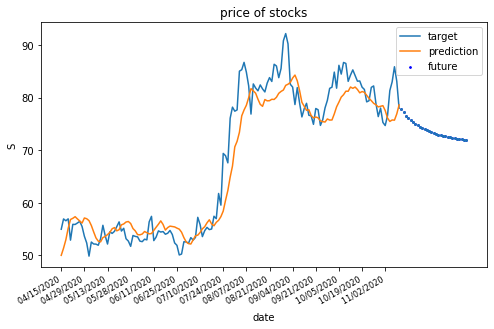

In [233]:
### 未来的预测
result = []
x_t = x_test[-1].reshape(1,5,1)
for i in range(30):
    p = model.predict(x_t)
    result.append(p[0])
    p = p.reshape(1,1,1)
    x_t = np.append(x_t,p,axis = 1)
    x_t = x_t[:,1:,:]

a = np.array(result[1:])

r = np.append(pred,a).reshape(-1,1)
r = scaler_y.inverse_transform(r)  # 反标准化

y_r = scaler_y.inverse_transform(y_test)  #真实值


plt.figure(figsize=(8,5))
plt.plot(date[:147][::-1],y_r)
plt.plot(date[:147][::-1],scaler_y.inverse_transform(pred))
xg = [* range(147,176)]
plt.scatter(xg,scaler_y.inverse_transform(a),s=3,c='b')
plt.xticks(date[:147][::-1][::10],size=8)
plt.legend(['target','prediction','future'])
xg = [* range(147,176)]
plt.scatter(xg,scaler_y.inverse_transform(a),s=3)

plt.ylabel('S')
plt.gcf().autofmt_xdate()
plt.xlabel('date')
plt.title('price of stocks')